## 데이터셋 불러오기

In [1]:
# TODO: 데이터 읽어와서 관찰하기
import pandas as pd
data = pd.read_csv('/Users/chonakyung/Library/CloudStorage/GoogleDrive-whskrud1007@gmail.com/내 드라이브/마이크로소프트/머신러닝/wine.csv')

In [2]:
data.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
data.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


## 데이터셋 가공

In [7]:
target = data['class']
feature = data[['alcohol','sugar','pH']]

In [10]:
# 특성과 타깃, 훈련세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target,test_target = train_test_split(feature,target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape,train_input.shape, test_target.shape)


(5197, 3) (1300, 3) (5197, 3) (1300,)


- 표준화는 각 피처(변수)의 값을 평균이 0이고 표준편차가 1이 되도록 변환하는 과정

- ss.fit(test_input)은 테스트 데이터의  평균과 표준편차를 따로 계산해서 모델 평가 과정에서 데이터의 분포를 미리 알게 되는 상황을 만들수 있으므로 할 필요가 없다.


In [14]:
#표준화하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
# 로지스틱 리그레션 적용하고 정확도 확인하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

lr.score(train_scaled, train_target)
lr.score(test_scaled, test_target)



0.7776923076923077

- lr.coef_ : 로지스틱 회귀 모델에서 학습된 각 피처(입력 변수)의 가중치로 모델이 얼마나 영향을 받는지를 의미
- lr.intercept_ : 학습된 절편으로 피처가 0일때 예측값에 더해지는 상수

In [17]:
# 결정트리리
print(lr.coef_, lr.intercept_)
# 도수랑 당도가 높을수록 산도가 낮을수록 화이트와인
# 반대는 레드와인

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 결정트리

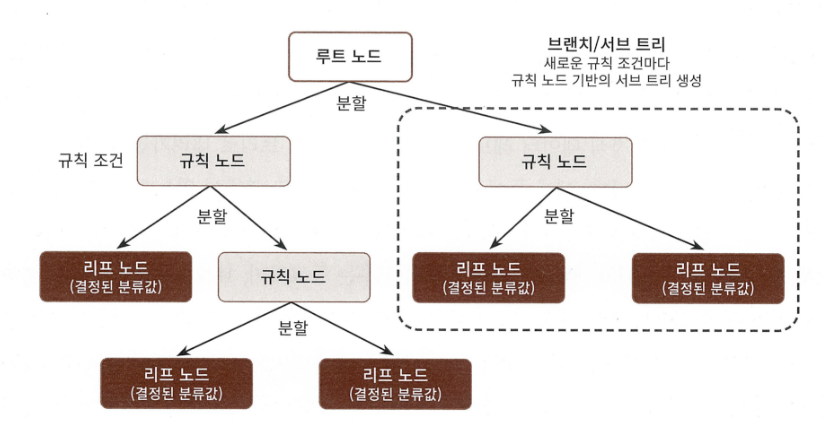

In [20]:
#결정트리 적용하고 정확도 확인하기
from sklearn.tree import DecisionTreeClassifier

Dt =DecisionTreeClassifier(random_state=42)
Dt.fit(train_scaled,train_target)

Dt.score(train_scaled, train_target)
Dt.score(test_scaled,test_target)

0.8592307692307692

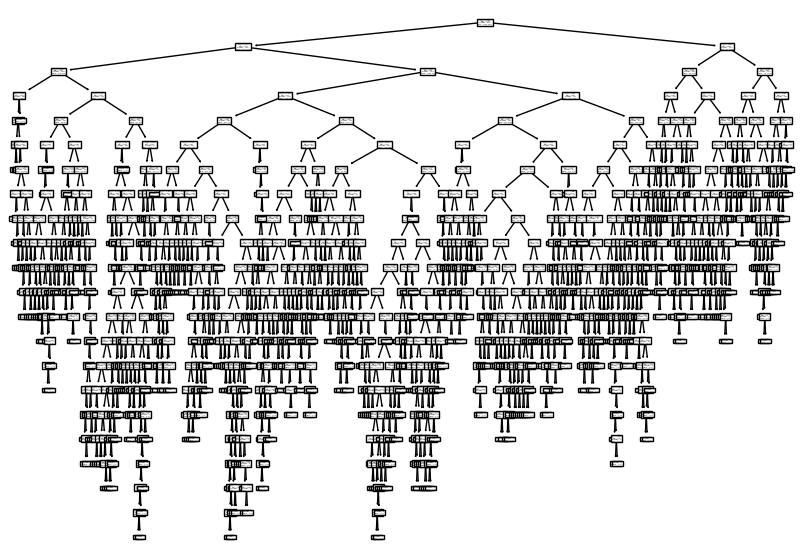

In [21]:
# 결정트리를 그림으로 표현하기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(Dt)
plt.show()

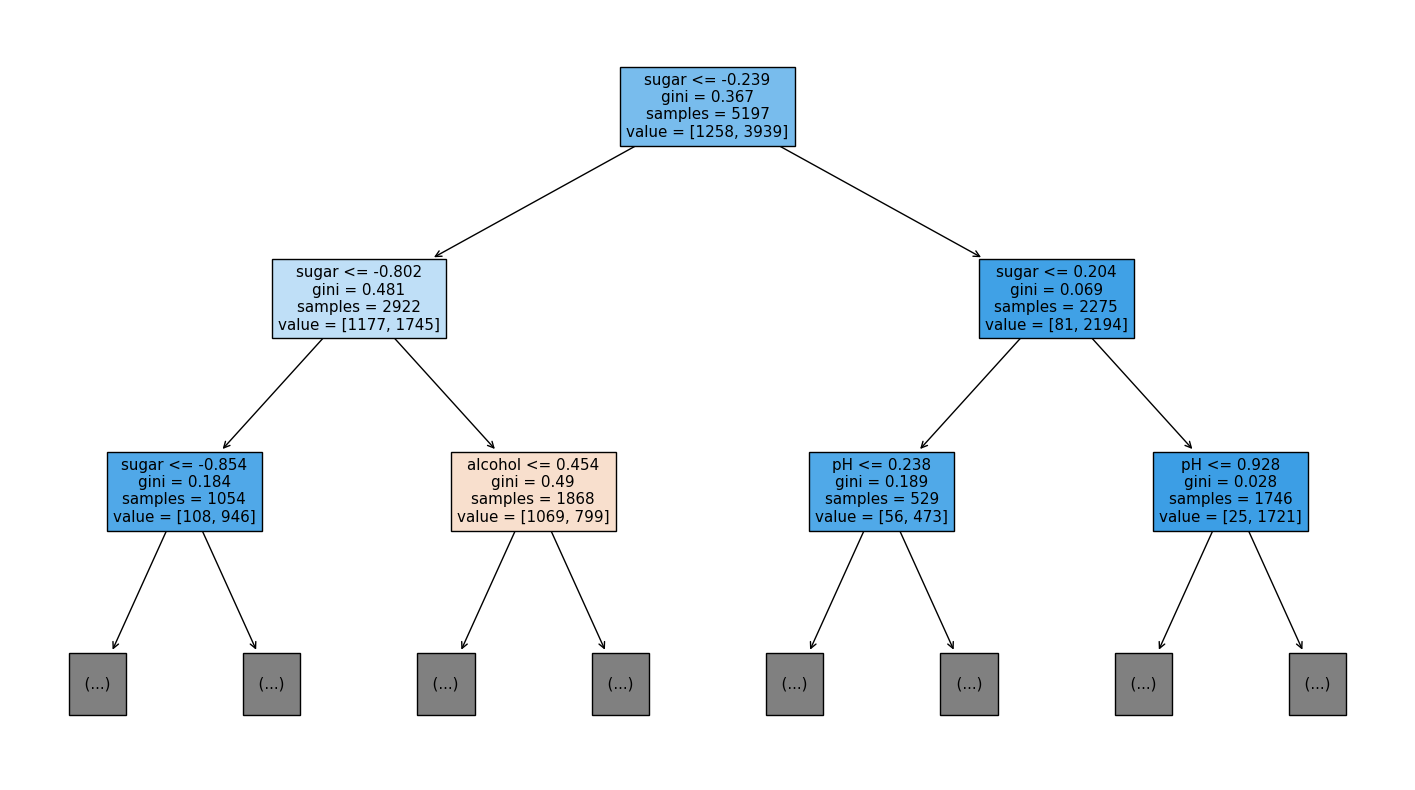

In [22]:
plt.figure(figsize=(18,10))
plot_tree(Dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [23]:
# TODO: 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


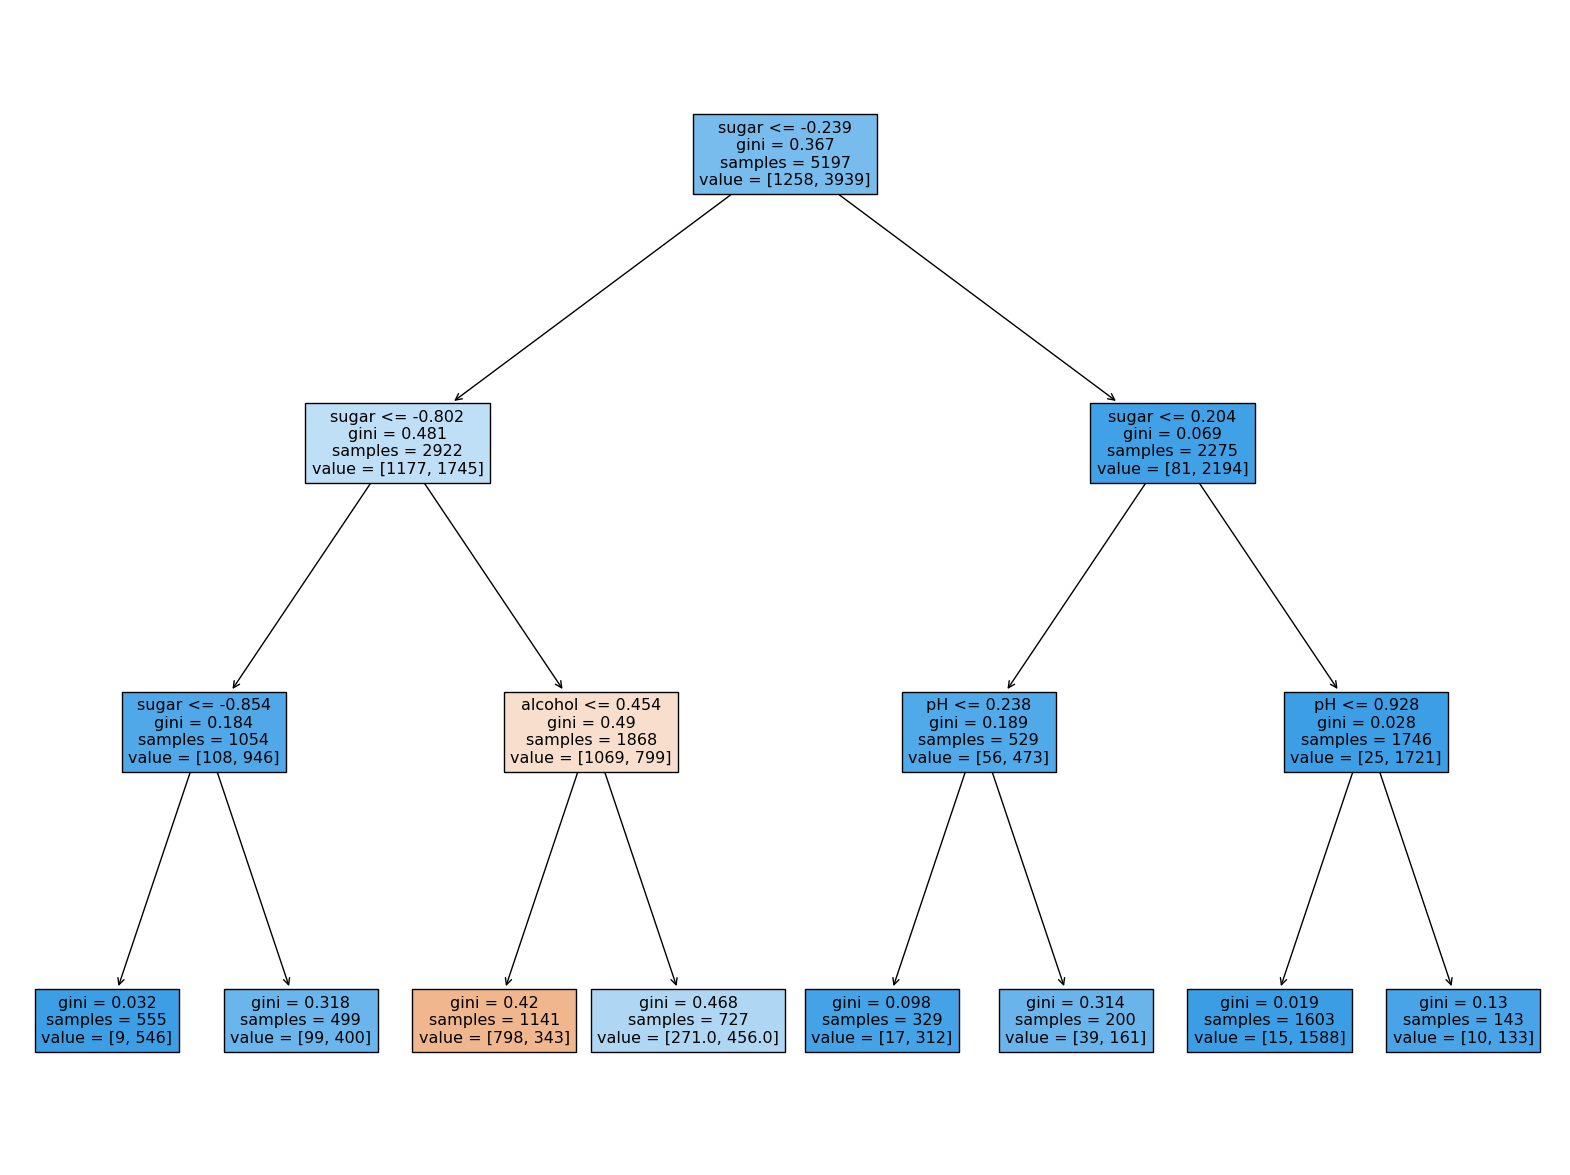

In [24]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [25]:
# TODO: 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산

print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
